In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


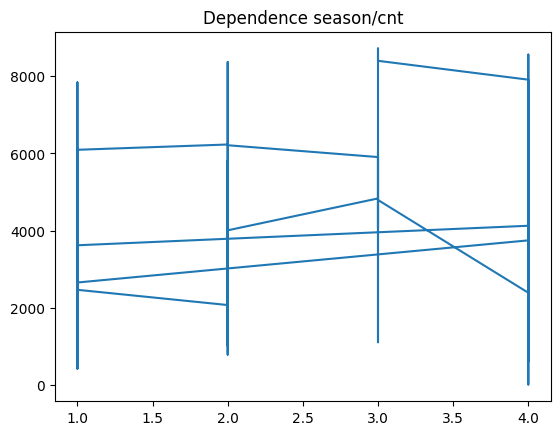

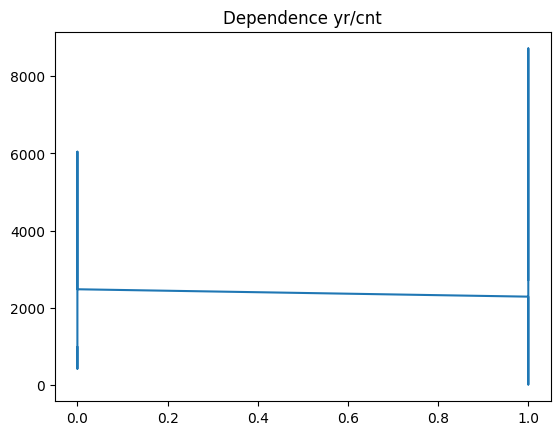

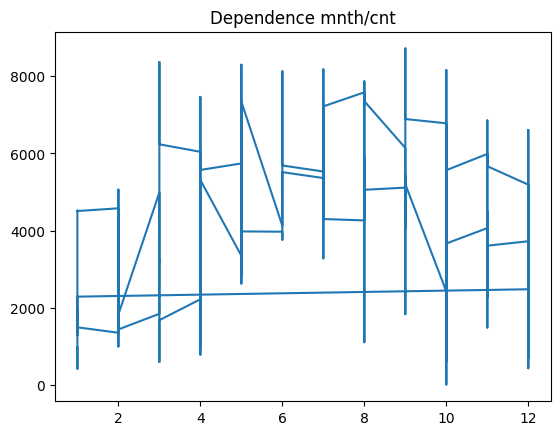

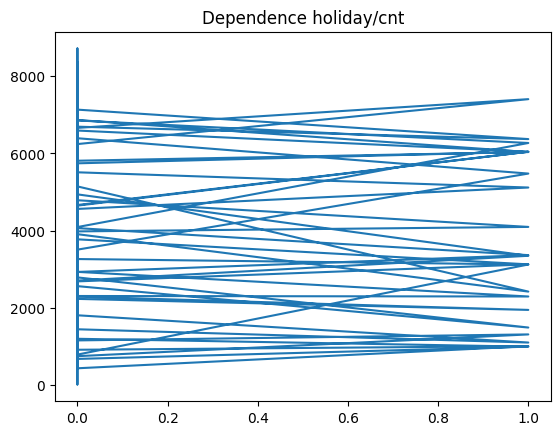

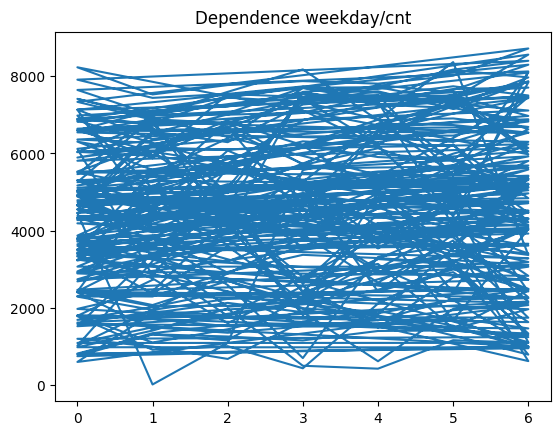

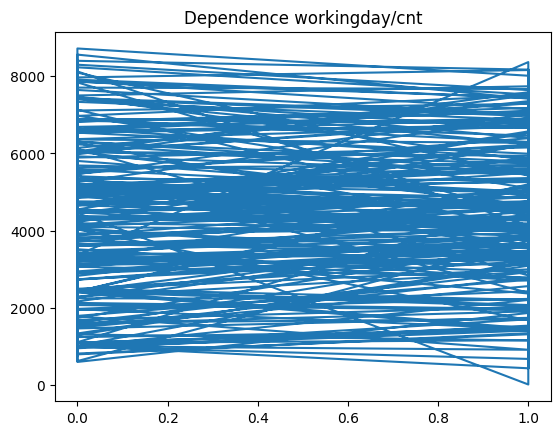

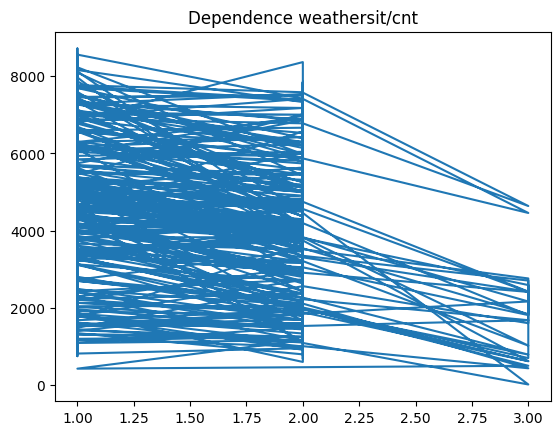

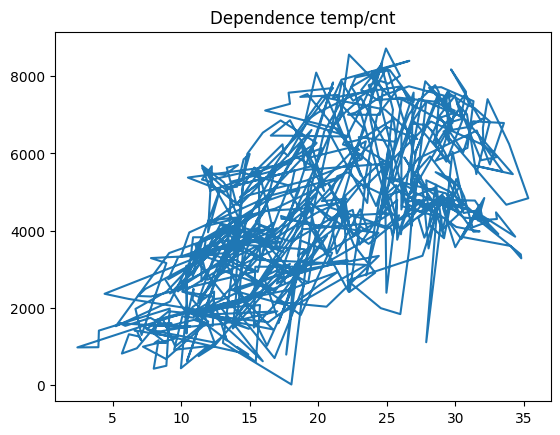

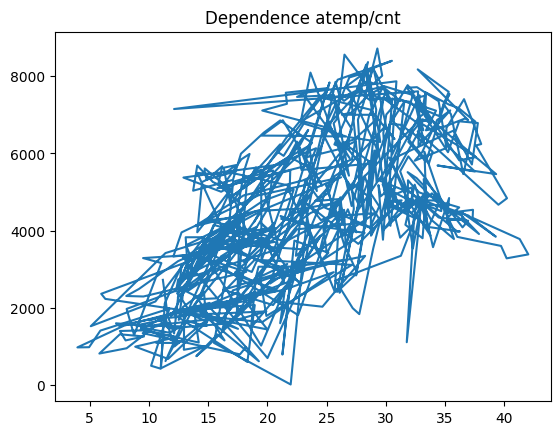

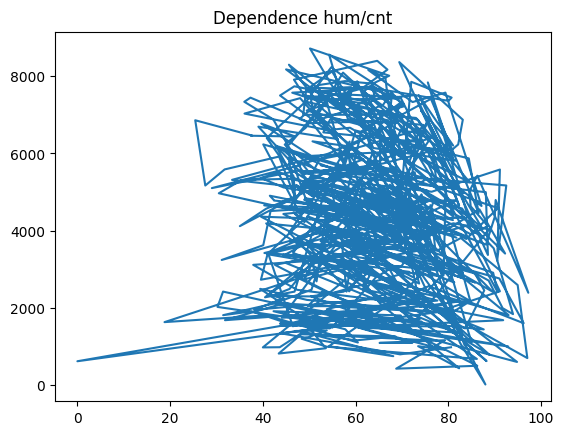

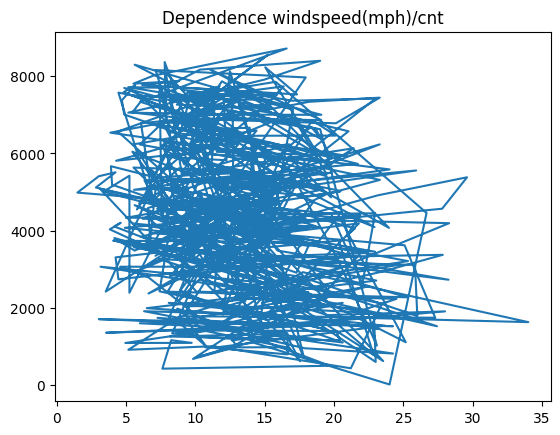

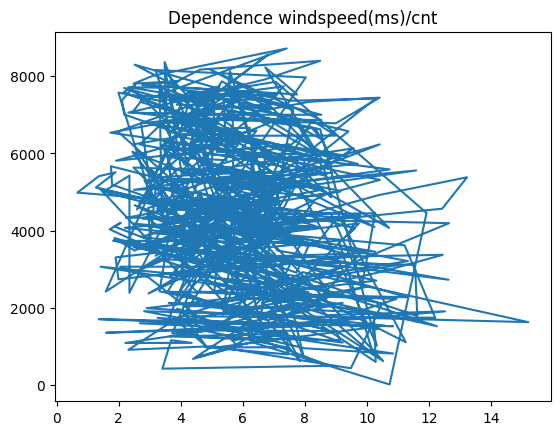

Питання:
Яким є характер залежності кількості прокатів від місяця? -Нелінійний.
Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно. -Yr.


In [120]:
#Завантажте датасет за допомогою функції pandas.read_csv в змінну df. Виведіть перших 5 рядків, щоб переконатись в корректному зчитуванні даних
df = pd.read_csv('bikes_rent.csv')
print(df.head())

#Побудуйте графіки залежностей атрибутів від кількості подорожей. 
#Тобто вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибуту від змінної cnt.
plt.title('Dependence season/cnt', fontsize=12)
plt.plot(df.season, df.cnt, label='Dependence season/cnt')
plt.show()

plt.title('Dependence yr/cnt', fontsize=12)
plt.plot(df.yr, df.cnt, label='Dependence yr/cnt')
plt.show()

plt.title('Dependence mnth/cnt', fontsize=12)
plt.plot(df.mnth, df.cnt, label='Dependence mnth/cnt')
plt.show()

plt.title('Dependence holiday/cnt', fontsize=12)
plt.plot(df.holiday, df.cnt, label='Dependence holiday/cnt')
plt.show()

plt.title('Dependence weekday/cnt', fontsize=12)
plt.plot(df.weekday, df.cnt, label='Dependence weekday/cnt')
plt.show()

plt.title('Dependence workingday/cnt', fontsize=12)
plt.plot(df.workingday, df.cnt, label='Dependence workingday/cnt')
plt.show()

plt.title('Dependence weathersit/cnt', fontsize=12)
plt.plot(df.weathersit, df.cnt, label='Dependence weathersit/cnt')
plt.show()

plt.title('Dependence temp/cnt', fontsize=12)
plt.plot(df.temp, df.cnt, label='Dependence temp/cnt')
plt.show()

plt.title('Dependence atemp/cnt', fontsize=12)
plt.plot(df.atemp, df.cnt, label='Dependence atemp/cnt')
plt.show()

plt.title('Dependence hum/cnt', fontsize=12)
plt.plot(df.hum, df.cnt, label='Dependence hum/cnt')
plt.show()

plt.title('Dependence windspeed(mph)/cnt', fontsize=12)
df.columns = df.columns.str.replace("(mph)", "_mph")
plt.plot(df.windspeed_mph, df.cnt, label='Dependence windspeed(mph)/cnt')
plt.show()

plt.title('Dependence windspeed(ms)/cnt', fontsize=12)
df.columns = df.columns.str.replace("(ms)", "_ms")
plt.plot(df.windspeed_ms, df.cnt, label='Dependence windspeed(ms)/cnt')
plt.show()

print('Питання:')
print('Яким є характер залежності кількості прокатів від місяця? -Нелінійний.', )
print('Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно. -Yr.')

In [121]:
#Порахуйте кореляцію Пірсона всіх ознак за допомогою corr, крім останньої, з останнім за допомогою методу corrwith.
corr_season_cnt = df['season'].corr(df['cnt'])
corr_yr_cnt = df['yr'].corr(df['cnt'])
corr_mnth_cnt = df['mnth'].corr(df['cnt'])
corr_holiday_cnt = df['holiday'].corr(df['cnt'])
corr_weekday_cnt = df['weekday'].corr(df['cnt'])
corr_workingday_cnt = df['workingday'].corr(df['cnt'])
corr_weathersit_cnt = df['weathersit'].corr(df['cnt'])
corr_temp_cnt = df['temp'].corr(df['cnt'])
corr_atemp_cnt = df['atemp'].corr(df['cnt'])
corr_hum_cnt = df['hum'].corr(df['cnt'])
corr_windspeed_mph_cnt = df['windspeed_mph'].corr(df['cnt'])
corr_windspeed_ms_cnt = df['windspeed_ms'].corr(df['cnt'])

print('Correlation of\n> season to cnt: ', np.round(corr_season_cnt, 4))
print('> year to cnt: ', np.round(corr_yr_cnt, 4))
print('> month to cnt: ', np.round(corr_mnth_cnt, 4))
print('> holiday to cnt: ', np.round(corr_holiday_cnt, 4))
print('> weekday to cnt: ', np.round(corr_weekday_cnt, 4))
print('> workingday to cnt: ', np.round(corr_workingday_cnt, 4))
print('> weathersit to cnt: ', np.round(corr_weathersit_cnt, 4))
print('> temp to cnt: ', np.round(corr_temp_cnt, 4))
print('> atemp to cnt: ', np.round(corr_atemp_cnt, 4))
print('> hum to cnt: ', np.round(corr_hum_cnt, 4))
print('> windspeed(mph) to cnt: ', np.round(corr_windspeed_mph_cnt, 4))
print('> windspeed(ms) to cnt: ', np.round(corr_windspeed_ms_cnt, 4))

#Порахуємо кореляції між речовими ознаками.
corr_season_mnth = df['season'].corr(df['workingday'])
corr_weekday_workingday = df['weekday'].corr(df['workingday'])
corr_temp_atemp = df['temp'].corr(df['atemp'])
corr_windspeed_mph_ms = df['windspeed_mph'].corr(df['windspeed_ms'])

print('\nCorrelation of\n> weekday to workingday: ', np.round(corr_weekday_workingday, 4))
print('> temp to atemp: ', np.round(corr_temp_atemp, 4))
print('> windspeed_mph to windspeed_ms: ', np.round(corr_windspeed_mph_ms, 4))

Correlation of
> season to cnt:  0.4061
> year to cnt:  0.5667
> month to cnt:  0.28
> holiday to cnt:  -0.0683
> weekday to cnt:  0.0674
> workingday to cnt:  0.0612
> weathersit to cnt:  -0.2974
> temp to cnt:  0.6275
> atemp to cnt:  0.6311
> hum to cnt:  -0.1007
> windspeed(mph) to cnt:  -0.2345
> windspeed(ms) to cnt:  -0.2345

Correlation of
> weekday to workingday:  0.0358
> temp to atemp:  0.9917
> windspeed_mph to windspeed_ms:  1.0


In [122]:
#Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) та cnt за допомогою методу corr.
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed_mph', 'windspeed_ms', 'cnt']].corr()
params = ['temp', 'atemp', 'hum', 'ws_mph', 'ws_ms', 'cnt']
corr_matrix_series = pd.DataFrame(corr_matrix, columns = params)
print(corr_matrix_series)

#Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.
mean_vect = mean_values = df.mean()
mean_series = pd.Series(mean_vect, index = params)
print('\nMean values:')
print(mean_series)

                   temp     atemp       hum  ws_mph  ws_ms       cnt
temp           1.000000  0.991702  0.126963     NaN    NaN  0.627494
atemp          0.991702  1.000000  0.139988     NaN    NaN  0.631066
hum            0.126963  0.139988  1.000000     NaN    NaN -0.100659
windspeed_mph -0.157944 -0.183643 -0.248489     NaN    NaN -0.234545
windspeed_ms  -0.157944 -0.183643 -0.248489     NaN    NaN -0.234545
cnt            0.627494  0.631066 -0.100659     NaN    NaN  1.000000

Mean values:
temp        20.310776
atemp       23.717699
hum         62.789406
ws_mph            NaN
ws_ms             NaN
cnt       4504.348837
dtype: float64


In [123]:
#Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо його середнє і поділимо стандартне відхилення. 
#Це можна зробити за допомогою методу scale. Крім того, потрібно перемішати вибірку, це буде потрібно для крос-валідації.
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Ваги ознак:")
print(lin_reg.coef_)

Ваги ознак:
[ 5.70863850e+02  1.02196837e+03 -1.41300427e+02 -8.67589679e+01
  1.37226024e+02  5.63920745e+01 -3.30228592e+02  3.67451876e+02
  5.85577746e+02 -1.45613147e+02  1.24564754e+13 -1.24564754e+13]


In [124]:
#Створіть об'єкт лінійного регресора, навчіть його на всіх даних та виведіть ваги моделі (ваги зберігаються в змінній coef_ класу регресора). 
feature_weights = list(zip(df.columns[:-1], lin_reg.coef_))
for params, weight in feature_weights:
    print(f"Ознака: {params}, Вага: {np.round(weight,2)}")

Ознака: season, Вага: 570.86
Ознака: yr, Вага: 1021.97
Ознака: mnth, Вага: -141.3
Ознака: holiday, Вага: -86.76
Ознака: weekday, Вага: 137.23
Ознака: workingday, Вага: 56.39
Ознака: weathersit, Вага: -330.23
Ознака: temp, Вага: 367.45
Ознака: atemp, Вага: 585.58
Ознака: hum, Вага: -145.61
Ознака: windspeed_mph, Вага: 12456475364833.37
Ознака: windspeed_ms, Вага: -12456475365031.84


In [130]:
#Давайте спробуємо навчити лінійні моделі з L1 і L2 -регуляризацією, а далі порівняємо їх ваги.
lasso_reg = Lasso()
lasso_reg.fit(X, y)
lasso_params_weights = list(zip(df.columns[:-1], lasso_reg.coef_))

ridge_reg = Ridge()
ridge_reg.fit(X, y)
ridge_params_weights = list(zip(df.columns[:-1], ridge_reg.coef_))

print('\nL1-регуляризацієя: \n')
for params, weight in lasso_params_weights:
    print(f"Ознака: {params}, Вага: {np.round(weight,2)}")

print('\nL2-регуляризацієя: \n')
for params, weight in ridge_params_weights:
    print(f"Ознака: {params}, Вага: {np.round(weight,2)}")


L1-регуляризацієя: 

Ознака: season, Вага: 560.24
Ознака: yr, Вага: 1019.46
Ознака: mnth, Вага: -128.73
Ознака: holiday, Вага: -86.15
Ознака: weekday, Вага: 137.35
Ознака: workingday, Вага: 55.21
Ознака: weathersit, Вага: -332.37
Ознака: temp, Вага: 376.36
Ознака: atemp, Вага: 576.53
Ознака: hum, Вага: -144.13
Ознака: windspeed_mph, Вага: -197.14
Ознака: windspeed_ms, Вага: -0.0

L2-регуляризацієя: 

Ознака: season, Вага: 563.06
Ознака: yr, Вага: 1018.95
Ознака: mnth, Вага: -131.87
Ознака: holiday, Вага: -86.75
Ознака: weekday, Вага: 138.01
Ознака: workingday, Вага: 55.9
Ознака: weathersit, Вага: -332.35
Ознака: temp, Вага: 386.46
Ознака: atemp, Вага: 566.35
Ознака: hum, Вага: -145.07
Ознака: windspeed_mph, Вага: -99.26
Ознака: windspeed_ms, Вага: -99.26


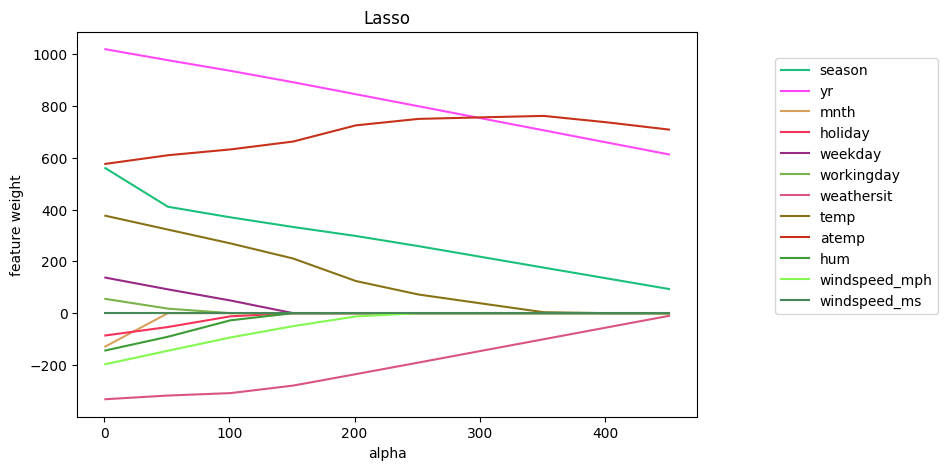

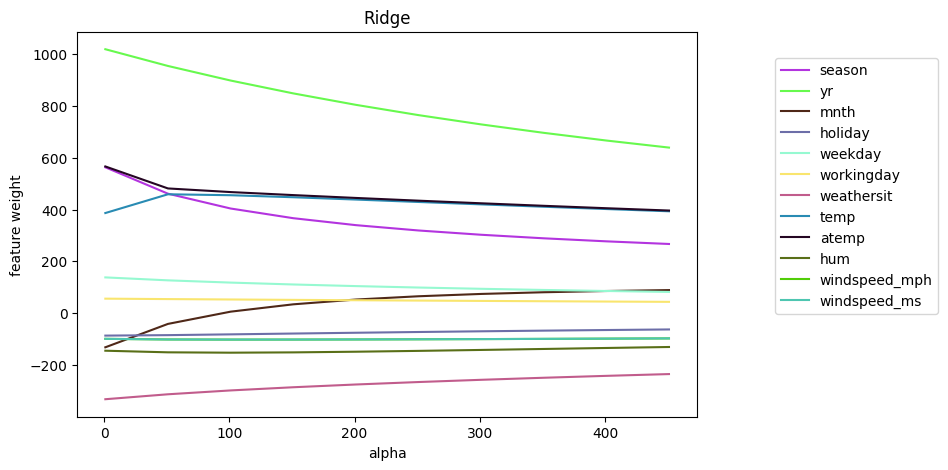

In [135]:
#Для кожного значення коефіцієнта з alphas навчіть регресор Lasso і запишіть ваги список coefs_lasso, 
#потім навчіть Ridge і запишіть ваги в список coefs_ridge. Конвертуйте отримані списки на np.array.
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X, y)
    coefs_lasso.append(lasso_reg.coef_)
    
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)
    coefs_ridge.append(ridge_reg.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

#Проаналізуйте динаміку ваги при збільшенні параметра регуляризації
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
   plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
   plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [151]:
#Проаналізуйте графіки та дайте відповіді на такі запитання.

#1) Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при тому самому alpha?
#-Lasso є більш агресивним регуляризатором порівняно з Ridge при тому самому значенні alpha.
#Він швидше зменшує ваги признаків та може навіть обнулити їх у разі великого alpha.

#2) Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть чому так відбувається.
#-Якщо alpha для Lasso дуже великий, багато з ваг може стати рівними нулю.
#Це відбувається через те, що Lasso використовує L1-регуляризацію, яка стягує ваги до нуля.
#Це спричинено тим, що функція штрафу має прямий вплив на абсолютні значення коефіцієнтів.

#3) Чи можна стверджувати, що Lasso виключає одну з ознак windspeed за будь-якого значення alpha > 0? 
#-Lasso може виключати одну з ознак windspeed при значенні alpha > 0.
#Таке явище відбувається через здатність L1-регуляризації (використованої в Lasso) обнулити ваги незначущих ознак.

#4) А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший 10^-3.
#-У випадку Ridge, який використовує L2-регуляризацію, ваги можуть стати дуже малими,
#але не досягати значення менше 10^-3, тому не можна стверджувати, що він виключає ознаку.

#5) Який із регуляризаторів підійде для відбору неінформативних ознак?
#-Lasso більш підходить для відбору неінформативних ознак через здатність обнулювати незначущі ваги,
#тоді як Ridge не виключає їх повністю, а тільки зменшує їх вплив.

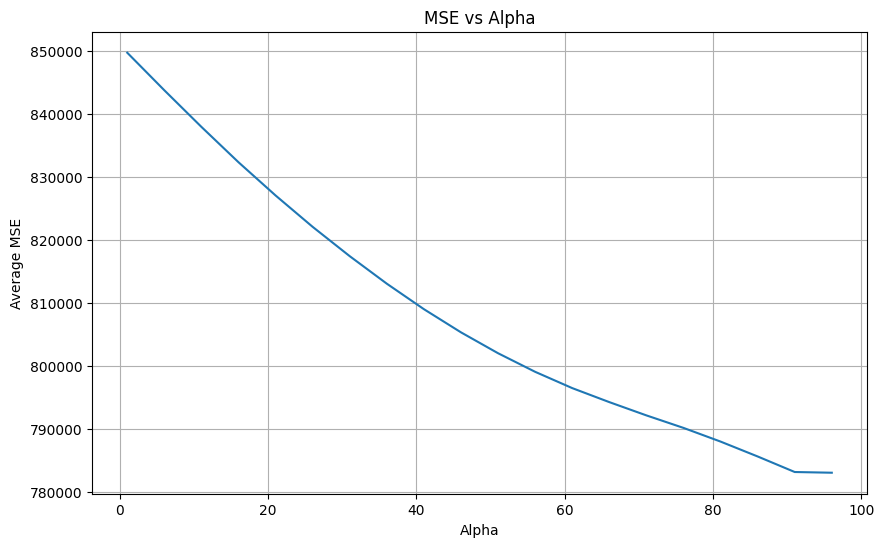

Selected alpha: 1
Ознака - Коефіцієнт:
season - 560.2416160308862
yr - 1019.4634940657196
mnth - -128.7306270367869
holiday - -86.15278133371095
weekday - 137.3478939049631
workingday - 55.21237064135677
weathersit - -332.3698569623486
temp - 376.36323620969597
atemp - 576.5307935045538
hum - -144.129155003486
windspeed_mph - -197.13968940248404
windspeed_ms - -2.8051512738133662e-08


In [152]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = [e[0] for e in data]
    y = [e[1] for e in data]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

#Навчіть регресор LassoCV на всіх параметрах регуляризації з alpha. 
alphas = np.arange(1, 100, 5)
regressor = LassoCV(alphas=alphas)
regressor.fit(X, y)

#Побудуйте графік усередненого рядками MSE залежно від alpha (використовуйте для цього функцію create_plot).
mse_alphas = [(alpha, np.mean(regressor.mse_path_[i])) for i, alpha in enumerate(alphas)]
create_plot(mse_alphas, 'MSE vs Alpha', 'Alpha', 'Average MSE', figsize=(10, 6))
    
#Виведіть вибране alpha, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.
chosen_alpha = regressor.alpha_
coefficients = dict(zip(df.columns[:-1], regressor.coef_))
print(f"Selected alpha: {chosen_alpha}")
print("Ознака - Коефіцієнт:")
for params, coef in coefficients.items():
    print(f"{params} - {coef}")

Alphas with minimum MSE:
Alpha = 1, MSE = 691447.250787807
Alpha = 11, MSE = 883471.1829425399
Alpha = 1, MSE = 710110.1624117335
Alpha = 26, MSE = 860737.405948872
Alpha = 21, MSE = 750676.3567789994


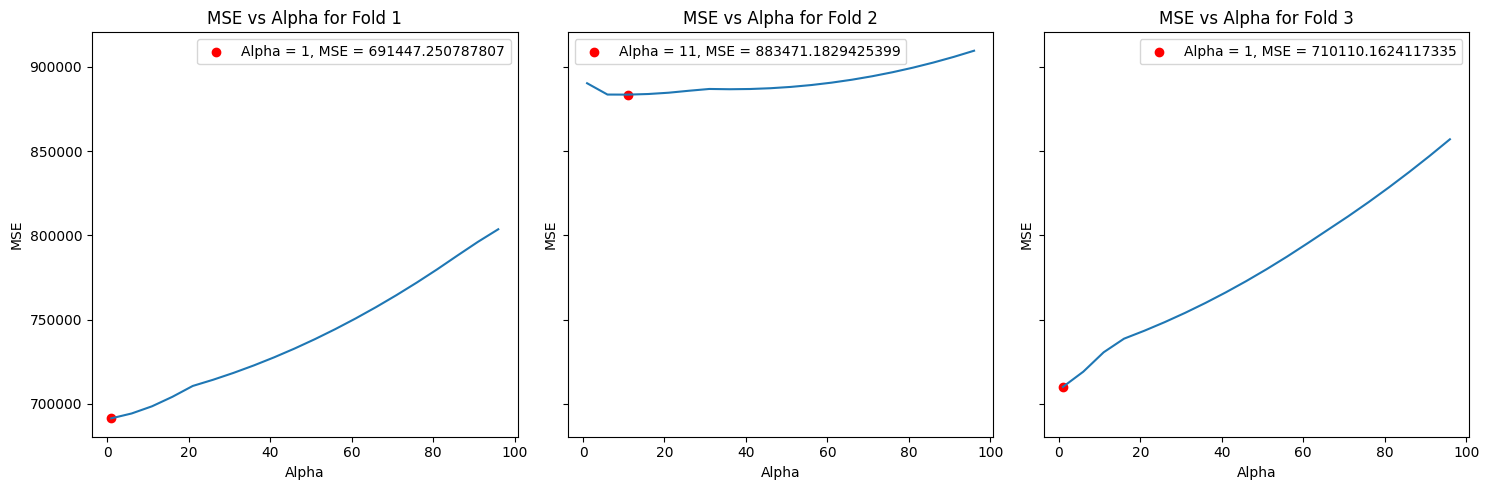

In [150]:
#Виведіть значення alpha, що відповідають мінімумам MSE на кожному розбитті (тобто стовпцям). 
min_mse_indexes = np.argmin(regressor.mse_path_, axis=0)
min_alpha_values = [regressor.alphas_[index] for index in min_mse_indexes]
min_mse_values = [np.min(regressor.mse_path_[:, i]) for i in range(regressor.mse_path_.shape[1])]
print("Alphas with minimum MSE:")
for i, alpha in enumerate(min_alpha_values):
    print(f"Alpha = {alpha}, MSE = {min_mse_values[i]}")

#На трьох окремих графіках візуалізуйте стовпці mse_path_.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.plot(regressor.alphas_, regressor.mse_path_[:, i])
    ax.scatter(min_alpha_values[i], min_mse_values[i], color='red', label=f"Alpha = {min_alpha_values[i]}, MSE = {min_mse_values[i]}")
    ax.set_title(f"MSE vs Alpha for Fold {i+1}")
    ax.set_xlabel("Alpha")
    ax.set_ylabel("MSE")
    ax.legend()

plt.tight_layout()
plt.show()

In [160]:
#Питання 1
print('1-В останній навченій моделі оберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), \
подивіться на візуалізації залежностей cnt від цих ознак, які ми малювали в блоці "Знайомство з даними". \
Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (зі здорового глузду), \
що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди? \nВідповідь:')
#Відповідь:
coef_values = regressor.coef_
params_names = df.columns[:-1]
top_pos_params = np.argsort(coef_values)[-4:][::-1]
top_neg_params = np.argsort(coef_values)[:3]
print("Назви ознак з найбільшими позитивними коефіцієнтами та їх значення:")
for params, coef in zip(params_names[top_pos_params], coef_values[top_pos_params]):
    print(f"{params} - {np.round(coef, 2)}")



#Питання 2
print('\n2-Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), \
подивіться відповідні візуалізації. Чи видно лінійну залежність, яка зменшується? \
Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди? \nВідповідь:')
#Відповідь:
print("Назви ознак з найбільшими від'ємними коефіцієнтами та їх значення:")
for params, coef in zip(params_names[top_neg_params], coef_values[top_neg_params]):
    print(f"{params} - {np.round(coef, 2)}")

#Питання 3
print('\n3-Випишіть ознаки з коефіцієнтами, близькими до нуля (<1e-3). Як ви вважаєте, чому модель виключила їх із моделі \
(знов подивіться на графіки)? Чи правда, що вони не впливають на попит на велосипеди? \nВідповідь:')
#Відповідь:
threshold = 1e-3
close_to_zero_params = np.where(abs(coef_values) < threshold)[0]
zero_coef_params = params_names[close_to_zero_params]
print("Ознаки з коефіцієнтами, близькими до нуля:\n", zero_coef_params)
print('Наразі ці ознаки не впливають на попит на велосипеди.')

1-В останній навченій моделі оберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми малювали в блоці "Знайомство з даними". Чи видно зростаючу лінійну залежність cnt від цих ознак за графіками? Чи логічно стверджувати (зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди? 
Відповідь:
Назви ознак з найбільшими позитивними коефіцієнтами та їх значення:
yr - 1019.46
atemp - 576.53
season - 560.24
temp - 376.36

2-Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться відповідні візуалізації. Чи видно лінійну залежність, яка зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди? 
Відповідь:
Назви ознак з найбільшими від'ємними коефіцієнтами та їх значення:
weathersit - -332.37
windspeed_mph - -197.14
hum - -144.13

3-Випишіть ознаки з коефіцієнтами, близькими 